In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import scipy
from scipy import stats
from scipy.stats import powerlaw

In [2]:
data = pd.read_csv('h1b_kaggle.csv')

## Wage Rate vs Applicantions

In [3]:
data = data[list(data)[1:]]
# data.quantile(0.99904)

In [4]:
wages = data['PREVAILING_WAGE']

In [5]:
wages = wages.dropna()

In [6]:
wages = wages[wages<300000]

In [7]:
binwidth = 1000
binwidth_normal = 1000
bins=np.arange(wages.min(), wages.max() + binwidth, binwidth)
bins_normal = np.arange(min(wages), max(wages) + binwidth_normal, binwidth_normal)

In [8]:
sorted_data = np.sort(wages)
yvals=np.arange(len(sorted_data)/float(len(sorted_data)-1))
normal_y_values = mlab.normpdf(bins_normal, wages.mean(), wages.std()).cumsum()
normal_y_values /= normal_y_values[-1]

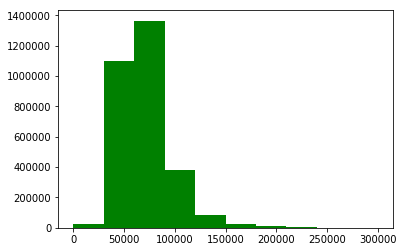

In [9]:
plt.hist(wages, facecolor='green')
plt.show()

In [10]:
wages_10 = wages.sample(10)
wages_100 = wages.sample(100)
wages_1000 = wages.sample(1000)
wages_10000 = wages.sample(10000)

In [12]:
wages_sample = wages

In [42]:
a = 1.65911332899

In [31]:
vals = powerlaw.ppf([1], a)

In [43]:
y  = powerlaw(a)

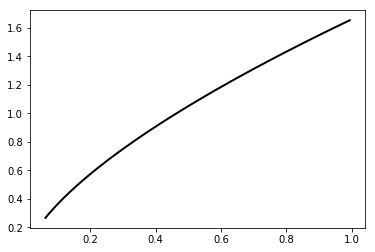

In [51]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(powerlaw.ppf(0.01, a),
              powerlaw.ppf(0.99, a), 100)
# ax.plot(x, powerlaw.pdf(x, a),
#          'r-', lw=5, alpha=0.6, label='powerlaw pdf')
rv = powerlaw(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

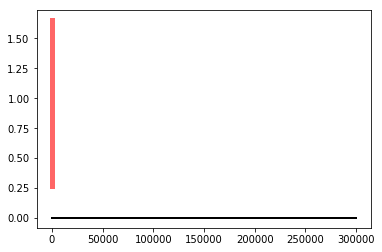

In [49]:
plt.plot(bins_normal,y.pdf(bins_normal),'k-', lw=2, label='frozen pdf')
plt.show()

In [71]:
from scipy.stats import kstest

mu,sigma = 0.07, 0.89
ks_2samp(np.random.gamma(1,100,10000),wages_10000)

Ks_2sampResult(statistic=1.0, pvalue=0.0)

In [60]:
W, p = scipy.stats.shapiro(wages_sample)

/usr/local/lib/python2.7/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [63]:
from scipy.stats import ks_2samp

In [18]:
ks_result = stats.kstest((wages_sample-wages_sample.mean())/wages_sample.std(),a)

TypeError: 'float' object is not callable

In [28]:
fig = plt.figure(1)

binwidth =10000
binwidth_normal = 1000
bins=np.arange(wages_sample.min(), wages_sample.max() + binwidth, binwidth)
bins_normal = np.arange(min(wages_sample), max(wages_sample) + binwidth_normal, binwidth_normal)
plt.hist(wages_sample,bins,normed=True,facecolor='black')
sorted_data = np.sort(wages_sample)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
ecdf, = plt.plot(sorted_data,yvals,color='blue',label='Empirical CDF')

normal_y_values = mlab.normpdf(bins_normal, wages_sample.mean(), wages_sample.std()).cumsum()
normal_y_values /= normal_y_values[-1]
powerlaw_y = powerlaw.cdf(vals,a)
normal_cdf, = plt.plot(bins_normal,normal_y_values,color='red',label='Normal CDF')
ks_result = stats.kstest((wages_sample-wages_sample.mean())/wages_sample.std(),powerlaw.cdf(vals,list(wages_sample)))
title =   'Sameple Size {0}\n'.format(10000)+r'  $\mu = {0}  \sigma={1}$'.format(np.round(wages_sample.mean(),2),np.round(wages_sample.std(),2)) + '\n KS statistic {0} P-Value {1}'.format(np.round(ks_result[0],2),ks_result[1])
plt.title(title)
plt.legend(handles=[ecdf,normal_cdf])
plt.xlabel('Prevailing Wage')

plt.show()

TypeError: 'numpy.ndarray' object is not callable

(20790.89975242893, 119740.86805555248)


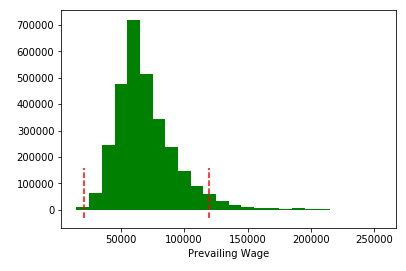

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(wages,bins,facecolor='green')
ax.set_xlabel('Prevailing Wage')
intervals = scipy.stats.norm.interval(0.95, loc=wages.mean(), scale=wages.std()) 
print intervals
ax.plot((intervals[0], intervals[0]), (-30000,160000 ), '--', color='red')
ax.plot((intervals[1], intervals[1]), (-30000,160000), '--', color='red')
# plt.text(0,30000,'Normal')
ax.annotate('annotate asdada', xy=(300000,10000), xytext=(20,30),
            arrowprops=dict(facecolor='red', shrink=50))
plt.show()

(20790.89975242893, 119740.86805555248)

In [126]:
data.loc[:,'WORKSITE']

0                MICHIGAN
1                   TEXAS
2              NEW JERSEY
3                COLORADO
4                MISSOURI
5                 FLORIDA
6                   TEXAS
7              CALIFORNIA
8                   TEXAS
9                VIRGINIA
10           PENNSYLVANIA
11               MICHIGAN
12          MASSACHUSETTS
13                FLORIDA
14               COLORADO
15               VIRGINIA
16              WISCONSIN
17             CALIFORNIA
18             CALIFORNIA
19               VIRGINIA
20             CALIFORNIA
21             CALIFORNIA
22             CALIFORNIA
23             CALIFORNIA
24                FLORIDA
25             CALIFORNIA
26               ILLINOIS
27             CALIFORNIA
28                  TEXAS
29                FLORIDA
                ...      
3002428      PENNSYLVANIA
3002429      PENNSYLVANIA
3002430        NEW JERSEY
3002431        NEW JERSEY
3002432        NEW JERSEY
3002433             TEXAS
3002434        NEW JERSEY
3002435    N

In [125]:
data.loc[:,'WORKSITE']=data.loc[:,'WORKSITE'].apply(lambda rec:rec.split(',')[1][1:]) 
                               # for getting the state of WORKSITE it is necessary
                               # to split the string and remove the space after comma
def change_NA(rec):            # There are 53 "states" incl. D.C., Puerto Rico and
    if (rec=='NA'):               # Mariana Islands, which were abbreviated as "NA"
        return 'MARIANA ISLANDS'
    return rec
data.loc[:,'WORKSITE']=data.loc[:,'WORKSITE'].apply(lambda rec: change_NA(rec))
print(len(data['WORKSITE'].unique()))

IndexError: list index out of range

In [127]:
US_states = ['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CALIFORNIA','COLORADO',
             'CONNECTICUT','DELAWARE','DISTRICT OF COLUMBIA','FLORIDA','GEORGIA',
             'HAWAII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY',
             'LOUISIANA','MAINE','MARIANA ISLANDS','MARYLAND','MASSACHUSETTS',
             'MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA',
             'NEVADA','NEW HAMPSHIRE','NEW JERSEY','NEW MEXICO','NEW YORK',
             'NORTH CAROLINA','NORTH DAKOTA','OHIO','OKLAHOMA','OREGON',
             'PENNSYLVANIA','PUERTO RICO','RHODE ISLAND','SOUTH CAROLINA',
             'SOUTH DAKOTA','TENNESSEE','TEXAS','UTAH','VERMONT','VIRGINIA',
             'WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING']
petitions_by_state = [0]*53              # filed petitions distribution by state
for i in range (0,53):
    petitions_by_state[i] = data[data.WORKSITE==US_states[i]]['WORKSITE'].count() 
pet_state = pd.DataFrame()
pet_state['WORKSITE'] = US_states
pet_state['FILED PETITIONS'] = petitions_by_state 
print(sum(petitions_by_state))

3002458


In [130]:
denied_by_state = [0]*53                # denied petitions distributions by state  
for i in range (0,53):
    denied_by_state[i] = denied[denied.STATE==US_states[i]]['STATE'].count()
den_state = pd.DataFrame()
den_state['STATE'] = US_states
den_state['DENIED PETITIONS'] = denied_by_state
print(sum(denied_by_state)) 

NameError: name 'denied' is not defined

In [131]:
denied = data[data.CASE_STATUS=='DENIED']  

In [132]:
denied_state_rate = [0]*53          # rate of denied petitions distributions by state  
for i in range(0,53):
    denied_state_rate[i] = float("%.2f" %((denied_by_state[i]/petitions_by_state[i])*100))

ratios = pd.DataFrame()
ratios['STATE'] = US_states
ratios['DENIED PETITIONS %'] = denied_state_rate

sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,5))
plt.title('DENIED PETITIONS RATE IN % BY STATE')
g = sns.barplot( x='STATE', y='DENIED PETITIONS %', data=ratios)
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)


NameError: name 'sns' is not defined

In [134]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003


In [137]:
wages_certified = data.loc[data['CASE_STATUS']=='CERTIFIED','PREVAILING_WAGE']
wages_denied = data.loc[data['CASE_STATUS']=='DENIED','PREVAILING_WAGE']

In [205]:
wages_certified = wages_certified[wages_certified<300000]
wages_denied = wages_denied[wages_denied<300000]
wages_denied = wages_denied.dropna()

In [206]:
wages_certified.mean()

69053.29638654436

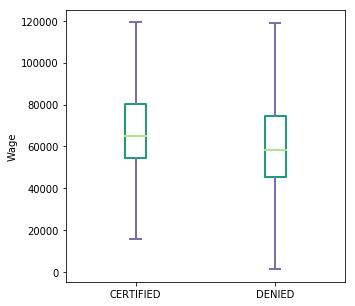

In [208]:
plt.figure(figsize=(5,5))
bp = plt.boxplot([wages_certified,wages_denied], labels=['CERTIFIED','DENIED'],showfliers=False)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( color = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.01)
plt.ylabel('Wage')
plt.show()

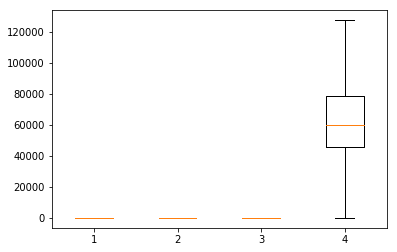

In [169]:
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 100)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 1)

## combine these different collections into a list    
data_to_plot = [collectn_1, collectn_2, collectn_3, wages_denied]
plt.boxplot(data_to_plot,showfliers=False)
plt.show()

In [161]:
wages_denied

39          187200.0
47          197683.2
91          116334.0
95          226699.0
98          202363.0
110          74276.8
112          72800.0
124         146300.0
158         187200.0
177         187200.0
180         163000.0
198          66373.0
214         202072.0
215         117998.0
234          66373.0
235          66373.0
237          66373.0
238          66373.0
239          66373.0
241          66373.0
243          66373.0
272          78000.0
305          70900.0
347         147326.0
388         103290.0
397        2648400.0
408         228946.0
414         215862.0
418         215862.0
420         233418.0
             ...    
3002316      46946.0
3002318      29910.0
3002319      58531.0
3002320      68349.0
3002323      52478.0
3002326      48090.0
3002327      73507.0
3002328      91749.0
3002330      47653.0
3002331      73174.0
3002333      54121.6
3002336      63107.0
3002339     226325.0
3002346      64792.0
3002347      94198.0
3002348      59737.6
3002350      

In [209]:
energy = pd.read_csv('Energy Census and Economic Data US 2010-2014.csv')

In [260]:
state_app_2010 = data.loc[data['YEAR'] == 2010].groupby('WORKSITE').count()
state_app_2011 = data.loc[data['YEAR'] == 2011].groupby('WORKSITE').count()
state_app_2012 = data.loc[data['YEAR'] == 2012].groupby('WORKSITE').count()
state_app_2013 = data.loc[data['YEAR'] == 2013].groupby('WORKSITE').count()
state_app_2014 = data.loc[data['YEAR'] == 2014].groupby('WORKSITE').count()


In [261]:
state_app_2011 = state_app_2011.reset_index()[['WORKSITE','Unnamed: 0']]
state_app_2012 = state_app_2012.reset_index()[['WORKSITE','Unnamed: 0']]
state_app_2013 = state_app_2013.reset_index()[['WORKSITE','Unnamed: 0']]
state_app_2014 = state_app_2014.reset_index()[['WORKSITE','Unnamed: 0']]

In [263]:
state_app_2011 = state_app_2011.drop(state_app_2011.index[[8,20,40]]).reset_index()
state_app_2012 = state_app_2012.drop(state_app_2012.index[[8,20,40]]).reset_index()
state_app_2013 = state_app_2013.drop(state_app_2013.index[[8,20,40]]).reset_index()
state_app_2014 = state_app_2014.drop(state_app_2014.index[[8,20,40]]).reset_index()

In [265]:
state_app_2011['Migration_rate'] = energy['RINTERNATIONALMIG2011']
state_app_2012['Migration_rate'] = energy['RINTERNATIONALMIG2012']
state_app_2013['Migration_rate'] = energy['RINTERNATIONALMIG2013']
state_app_2014['Migration_rate'] = energy['RINTERNATIONALMIG2014']

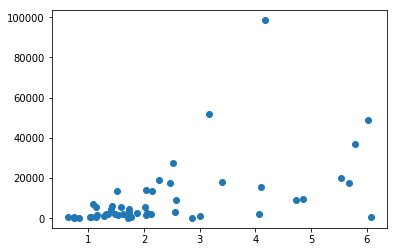

In [275]:
plt.scatter(state_app_2014['Migration_rate'],state_app_2014['Unnamed: 0'])
plt.show()

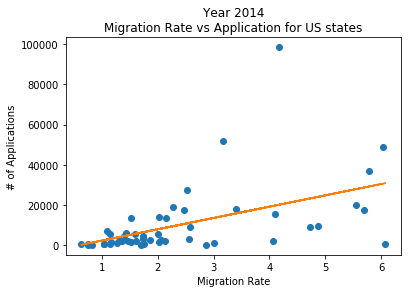

In [293]:
m, b = np.polyfit(state_app_2014['Migration_rate'],state_app_2014['Unnamed: 0'], 1)

plt.plot(state_app_2014['Migration_rate'],state_app_2014['Unnamed: 0'], 'o')
plt.plot(state_app_2014['Migration_rate'], m*state_app_2014['Migration_rate'] + b, '-')
plt.xlabel('Migration Rate')
plt.ylabel('# of Applications')
plt.title('Year {0}\nMigration Rate vs Application for US states'.format(year))
plt.show()

In [302]:
migration = state_app_2011['Migration_rate']
applications = state_app_2011['Unnamed: 0']
year = 2011

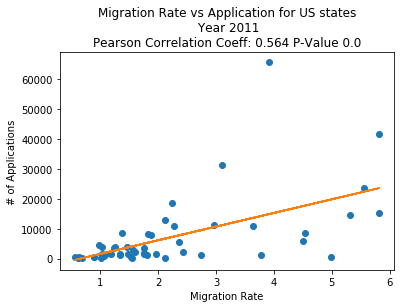

In [303]:
m, b = np.polyfit(migration,applications, 1)
plt.plot(migration,applications, 'o')
plt.plot(migration, m*migration + b, '-')
plt.xlabel('Migration Rate')
plt.ylabel('# of Applications')
result = scipy.stats.pearsonr(migration,applications)
plt.title('Migration Rate vs Application for US states\n Year {0}\nPearson Correlation Coeff: {1} P-Value {2}'.format(year,np.round(result[0],3),np.round(result[1],3)))    
plt.show()

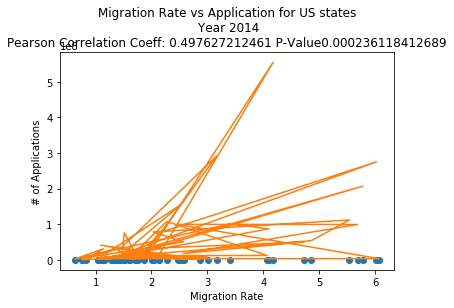

In [289]:
plt_scatter(state_app_2014['Migration_rate'],state_app_2014['Unnamed: 0'],'2014')

In [278]:
scipy.stats.pearsonr(state_app_2014['Migration_rate'],state_app_2014['Unnamed: 0'])

(0.49762721246062219, 0.00023611841268863102)

In [279]:
scipy.stats.pearsonr(state_app_2013['Migration_rate'],state_app_2013['Unnamed: 0'])

(0.48404854130096936, 0.00036866294494243784)

In [280]:
scipy.stats.pearsonr(state_app_2012['Migration_rate'],state_app_2012['Unnamed: 0'])

(0.46323491439267872, 0.00070483469079885941)

In [281]:
scipy.stats.pearsonr(state_app_2011['Migration_rate'],state_app_2011['Unnamed: 0'])

(0.56434179623169944, 1.9678597999479095e-05)

In [259]:
energy = energy.drop(energy.index[[50,51]])

In [242]:
energy['RINTERNATIONALMIG2013']

0     1.165832
1     3.203618
2     1.090035
3     2.141877
4     4.207353
5     2.074200
6     4.753602
7     2.608949
8     5.783717
9     2.510526
10    6.426691
11    1.052850
12    2.505015
13    1.586775
14    1.732413
15    2.106968
16    1.394732
17    1.651933
18    1.045424
19    4.914731
20    5.589799
21    2.029017
22    2.583619
23    0.784164
24    1.454160
25    0.792069
26    2.056139
27    3.032412
28    1.536359
29    5.799240
30    1.283954
31    6.051932
32    2.260641
33    1.915034
34    1.518581
35    1.508701
36    1.728175
37    2.272758
38    4.106380
39    1.379318
40    1.751176
41    1.417493
42    3.201213
43    1.888857
44    1.150844
45    4.195152
46    3.455210
47    0.631283
48    1.129419
49    0.858535
50    5.871584
51    3.168211
Name: RINTERNATIONALMIG2013, dtype: float64